# Jakarta Air Quality Visualization

### Polluted air in Indonesia, especially Jakarta is currently a hot topic in the society. It motivates me to understand a little bit deeper by visualizing the data provided.

### Data Source: https://aqicn.org/ 
### Tools      : Python, Jupyter Notebook

## Import Libraries and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('jakarta-air-quality.csv')

In [4]:
df

,date,pm25,pm10
0,2023/8/1,102,55
1,2023/8/2,130,65
2,2023/8/3,135,68
3,2023/8/4,136,60
4,2023/8/5,125,91
...,...,...,...
2021,2015/9/15,,104
2022,2015/9/16,,81
2023,2015/9/17,,93
2024,2015/9/18,,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2026 non-null   object
 1    pm25   2026 non-null   object
 2    pm10   2026 non-null   object
dtypes: object(3)
memory usage: 47.6+ KB


In [6]:
df.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

**Key Takeaways**:
- The Dataset contains 2026 rows & 3 columns of data.
- The datatypes of every columns is object.
- There is a space in the pm25 and pm10 column names.

In [7]:
df_fix = df.copy()

In [8]:
df_fix.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

## Rename column names and change date data type to datetime

In [9]:
df_fix['date'] = pd.to_datetime(df_fix['date'])
df_fix['pm25'] = df_fix[' pm25'].str.strip()
df_fix['pm10'] = df_fix[' pm10'].str.strip()

In [10]:
df_fix.drop(columns = [' pm25', ' pm10'], axis =1, inplace = True)
df_fix.head(10)

,date,pm25,pm10
0,2023-08-01,102,55
1,2023-08-02,130,65
2,2023-08-03,135,68
3,2023-08-04,136,60
4,2023-08-05,125,91
5,2023-08-06,144,81
6,2023-08-07,159,69
7,2023-08-08,157,66
8,2023-08-09,151,67
9,2023-08-10,156,67


In [11]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2026 non-null   datetime64[ns]
 1   pm25    2026 non-null   object        
 2   pm10    2026 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 47.6+ KB


In [12]:
df_fix['date'].sort_values()

1979   2015-07-16
1980   2015-07-17
1981   2015-07-18
1982   2015-07-19
1983   2015-07-20
          ...    
6      2023-08-07
7      2023-08-08
8      2023-08-09
9      2023-08-10
10     2023-08-11
Name: date, Length: 2026, dtype: datetime64[ns]

#### The date is from 2015/07/16 - 2023/08/11

### There are rows in pm25 & pm10 filled with space ('') which should be replaced with NaN or Null

In [13]:
df_fix[df_fix['pm10']==''] 

,date,pm25,pm10
10,2023-08-11,169,
11,2023-07-01,127,
12,2023-07-02,115,
13,2023-07-03,129,
14,2023-07-04,116,
...,...,...,...
1211,2018-07-12,129,
1212,2018-07-13,130,
1213,2018-07-14,149,
1214,2018-07-15,88,


In [14]:
df_fix[df_fix['pm25']==''] 

,date,pm25,pm10
1312,2022-06-01,,38
1313,2022-01-03,,35
1314,2022-01-04,,39
1315,2022-01-05,,68
1316,2022-01-06,,52
...,...,...,...
2021,2015-09-15,,104
2022,2015-09-16,,81
2023,2015-09-17,,93
2024,2015-09-18,,86


In [15]:
df_fix.replace('', np.nan, inplace=True)

## Convert pm25 & pm10 to numeric 

In [16]:
#Convert to numeric types
df_fix[['pm25','pm10']] = df_fix[['pm25','pm10']].astype(float)

In [17]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2026 non-null   datetime64[ns]
 1   pm25    1312 non-null   float64       
 2   pm10    1459 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 47.6 KB


In [18]:
df_fix.describe()

,pm25,pm10
count,1312.000000,1459.000000
mean,88.849085,49.177519
std,40.908058,19.940120
min,1.000000,1.000000
25%,58.000000,35.000000
50%,97.000000,50.000000
75%,122.000000,62.000000
max,222.000000,250.000000


In [19]:
df_fix.isna().sum()

date      0
pm25    714
pm10    567
dtype: int64

### Fill the Null Values

In [20]:
df_fix['pm25'].fillna(df_fix['pm25'].median(), inplace = True)
df_fix['pm10'].fillna(df_fix['pm10'].median(), inplace = True)

In [21]:
df_fix.isna().sum()

date    0
pm25    0
pm10    0
dtype: int64

In [22]:
df_fix.sort_values('date')

,date,pm25,pm10
1979,2015-07-16,97.0,62.0
1980,2015-07-17,97.0,63.0
1981,2015-07-18,97.0,60.0
1982,2015-07-19,97.0,60.0
1983,2015-07-20,97.0,59.0
...,...,...,...
6,2023-08-07,159.0,69.0
7,2023-08-08,157.0,66.0
8,2023-08-09,151.0,67.0
9,2023-08-10,156.0,67.0


# Exploratory Data Analysis

In [23]:
df_fix.describe()

,pm25,pm10
count,2026.000000,2026.000000
mean,91.721619,49.407700
std,33.144927,16.923783
min,1.000000,1.000000
25%,81.000000,41.000000
50%,97.000000,50.000000
75%,108.000000,57.000000
max,222.000000,250.000000


Text(0.5, 1.0, 'Distribution of pm10')

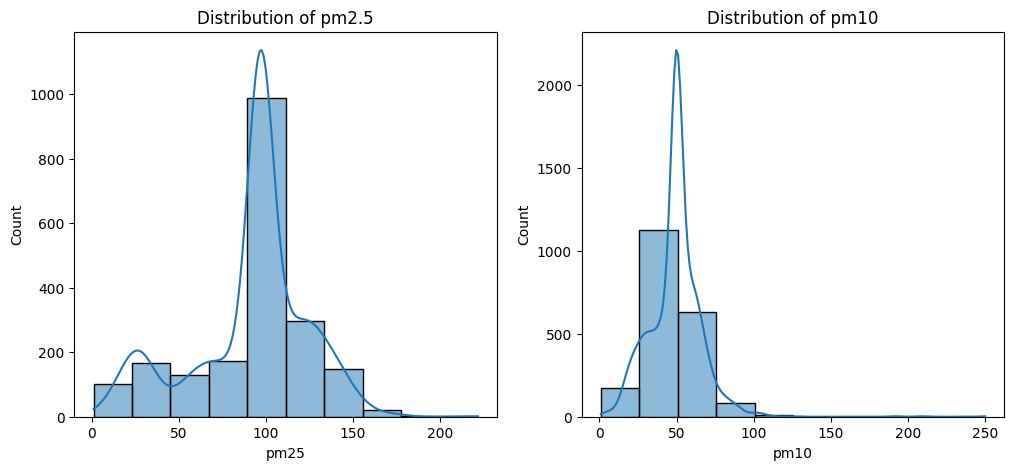

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_fix['pm25'], bins=10, kde=True)
plt.title('Distribution of pm2.5')

plt.subplot(1, 2, 2)
sns.histplot(df_fix['pm10'], bins=10, kde=True)
plt.title('Distribution of pm10')

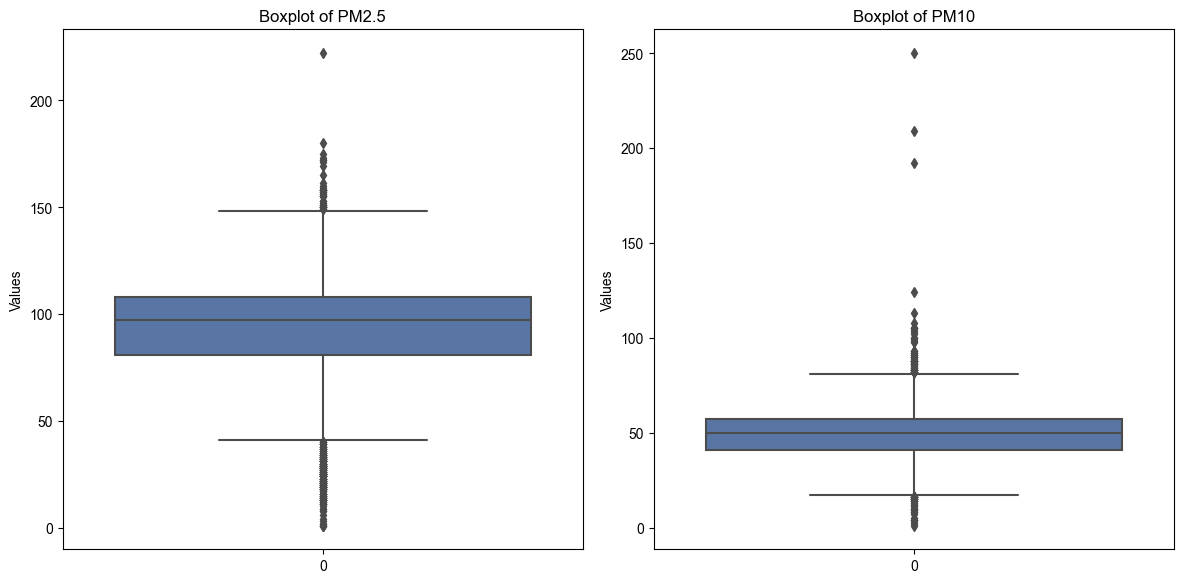

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.set(style="whitegrid")  # Optional: Set a prettier style

# Boxplot for Feature 1
sns.boxplot(data=df_fix['pm25'], ax=axes[0])
axes[0].set_title("Boxplot of PM2.5")
axes[0].set_ylabel("Values")

# Boxplot for Feature 2
sns.boxplot(data=df_fix['pm10'], ax=axes[1])
axes[1].set_title("Boxplot of PM10")
axes[1].set_ylabel("Values")

plt.tight_layout()  # To prevent overlap
plt.show()

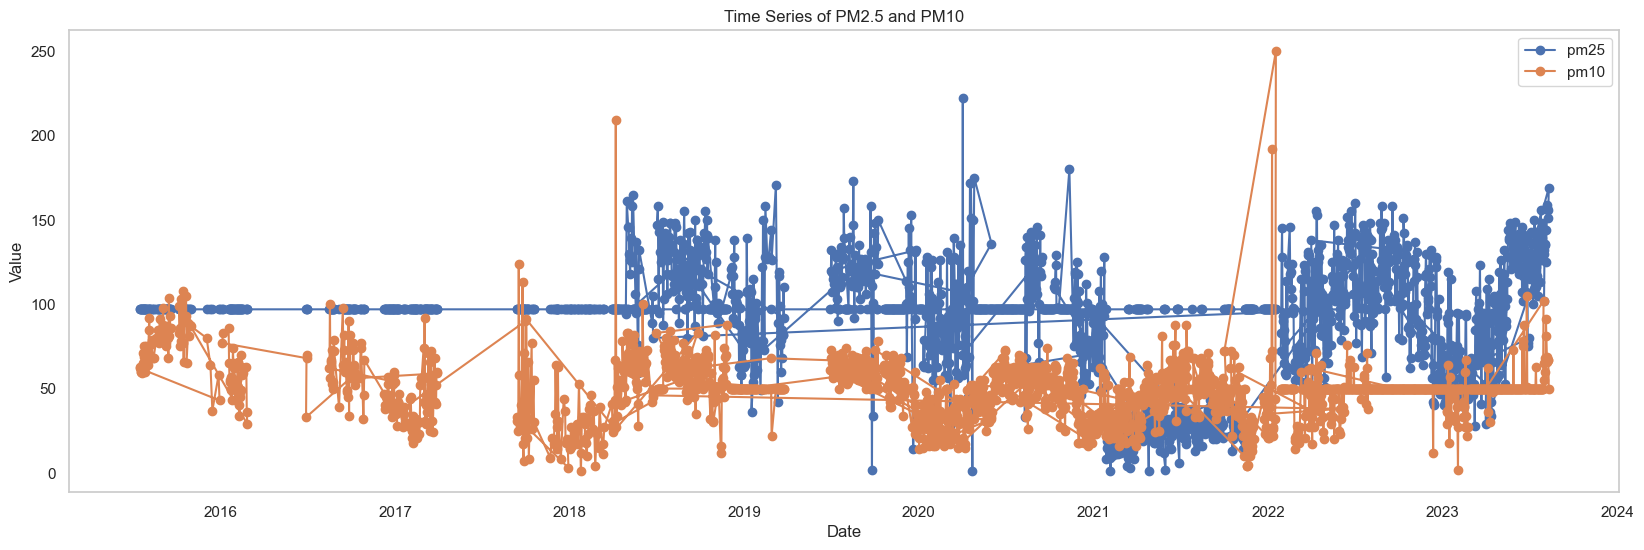

In [26]:
plt.figure(figsize=(20, 6))

plt.plot(df_fix['date'], df_fix['pm25'], label='pm25', marker='o')
plt.plot(df_fix['date'], df_fix['pm10'], label='pm10', marker='o')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of PM2.5 and PM10')
plt.legend()
plt.grid()

plt.show()

**Key Takeaways:**
- PM2.5 data is normally distributed but the PM10 is rather right-skewed.
- There are a few outliers especially in PM10 data.
- The daily resolution data is difficult to analyzed, thus try to see in another temporal resolution.
- PM2.5 data in 2015-2018 contains a lot of missing value, thus it is better to subset the data from 2019.

In [27]:
df_fix1 = df_fix.copy()
df_fix1.set_index('date', inplace=True)

# Resample and calculate monthly averages
monthly_averages = df_fix1.resample('M').mean()

In [28]:
monthly_averages

,pm25,pm10
date,,
2015-07-31,97.000000,65.750000
2015-08-31,97.000000,78.666667
2015-09-30,97.000000,84.500000
2015-10-31,97.000000,87.894737
2015-11-30,NaN,NaN
...,...,...
2023-04-30,78.366667,49.200000
2023-05-31,116.548387,50.741935
2023-06-30,121.800000,54.900000


In [29]:
monthly_averages['pm25'].fillna(monthly_averages['pm25'].median(), inplace = True)
monthly_averages['pm10'].fillna(monthly_averages['pm10'].median(), inplace = True)

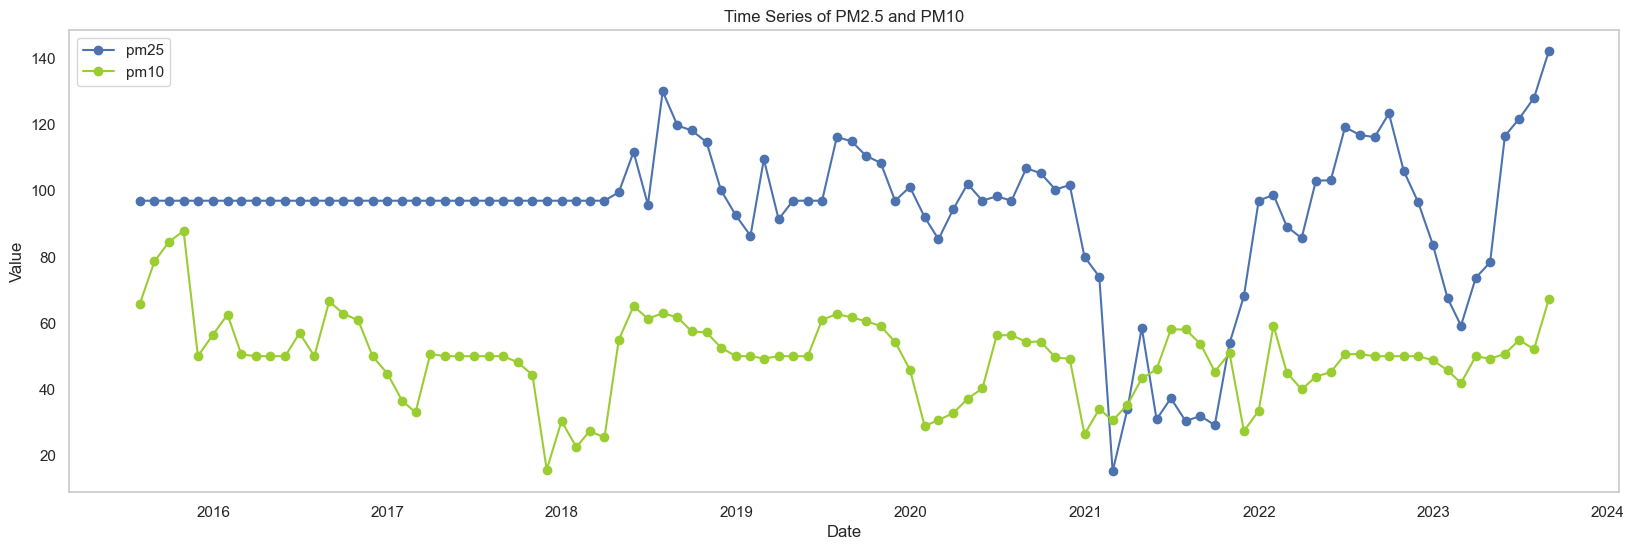

In [30]:
plt.figure(figsize=(20, 6))

plt.plot(monthly_averages.index, monthly_averages['pm25'], label='pm25', marker='o')
plt.plot(monthly_averages.index, monthly_averages['pm10'], label='pm10', marker='o', color = 'yellowgreen')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of PM2.5 and PM10')
plt.legend()
plt.grid()

plt.show()
# In this example, we first convert the 'date' column to a datetime format and set it as the DataFrame index. Then, we use plt.plot() to create line plots for both 'pm25' and 'pm10' columns against the date index. The marker='o' argument adds markers at the data points, and plt.legend() adds a legend to differentiate between the two lines.


In [31]:
ma_2019 = df_fix[df_fix['date'] >= '2019-01-01']
ma_2019.sort_values

<bound method DataFrame.sort_values of            date   pm25  pm10
0    2023-08-01  102.0  55.0
1    2023-08-02  130.0  65.0
2    2023-08-03  135.0  68.0
3    2023-08-04  136.0  60.0
4    2023-08-05  125.0  91.0
...         ...    ...   ...
1638 2019-08-18   97.0  68.0
1639 2019-08-31   97.0  61.0
1640 2019-09-15   97.0  56.0
1641 2019-09-21   97.0  66.0
1642 2019-02-25   97.0  68.0

[1482 rows x 3 columns]>

In [32]:
ma_2019.tail(5)

,date,pm25,pm10
1638,2019-08-18,97.0,68.0
1639,2019-08-31,97.0,61.0
1640,2019-09-15,97.0,56.0
1641,2019-09-21,97.0,66.0
1642,2019-02-25,97.0,68.0


In [33]:
ma_2019.set_index('date', inplace=True)

ma_2019 = ma_2019.resample('M').mean()


In [34]:
ma_2019

,pm25,pm10
date,,
2019-01-31,86.400000,50.000000
2019-02-28,109.500000,49.285714
2019-03-31,91.400000,50.000000
2019-04-30,NaN,NaN
2019-05-31,NaN,NaN
2019-06-30,97.000000,61.000000
2019-07-31,116.258065,62.741935
2019-08-31,114.967742,61.709677
2019-09-30,110.586207,60.586207


In [35]:
ma_2019['pm25'].fillna(ma_2019['pm25'].median(), inplace = True)
ma_2019['pm10'].fillna(ma_2019['pm10'].median(), inplace = True)

In [36]:
ma_2019.describe()

,pm25,pm10
count,56.000000,56.000000
mean,88.877721,47.897528
std,28.459333,9.534227
min,15.214286,26.354839
25%,77.283065,43.691667
50%,97.000000,50.000000
75%,106.201613,54.292742
max,142.181818,67.181818


# Compare Monthly PM2.5 & PM10

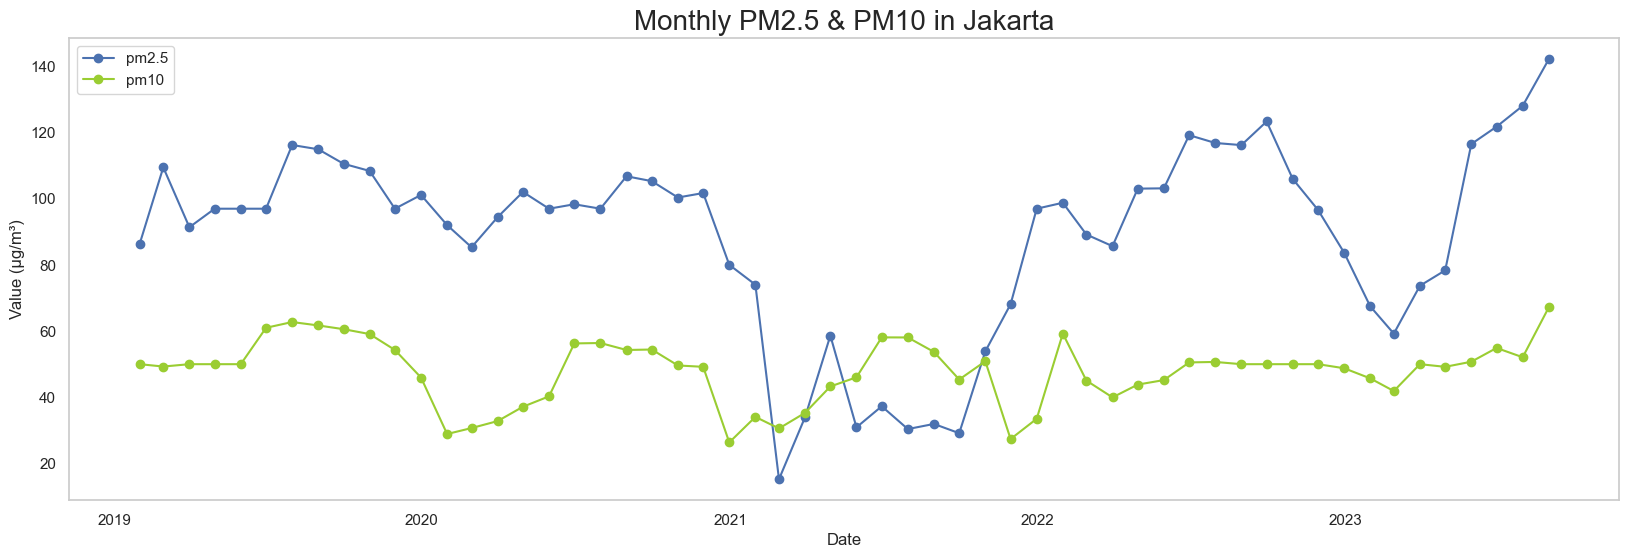

In [37]:
plt.figure(figsize=(20, 6))

plt.plot(ma_2019.index, ma_2019['pm25'], label='pm2.5', marker='o')
plt.plot(ma_2019.index, ma_2019['pm10'], label='pm10', marker='o', c = 'yellowgreen')
# plt.axhline(y=15, color='r', linestyle='--', label='WHO')
# plt.axhline(y=55, color='purple', linestyle='--', label='PP No. 22/2021')

plt.xlabel('Date')
plt.ylabel("Value (\u00B5g/m³)")
plt.title('Monthly PM2.5 & PM10 in Jakarta', size =20)
plt.legend()
plt.grid()

plt.show()

# Insights

1. There are seasonal variations in both variables. In wet season of Indonesia (near year end) PM2.5 and PM10 tend to decrease, reversely in dry months (beginning of the year), both variables tend to increase.
2. PM2.5 in 2021 had a significant drop, it is suspected to be related to the strict PPKM in early 2021 in Jakarta.
3. Both variables is currently increasing and has reached the highest record.

# Focus on PM2.5 and The Standard Regulations

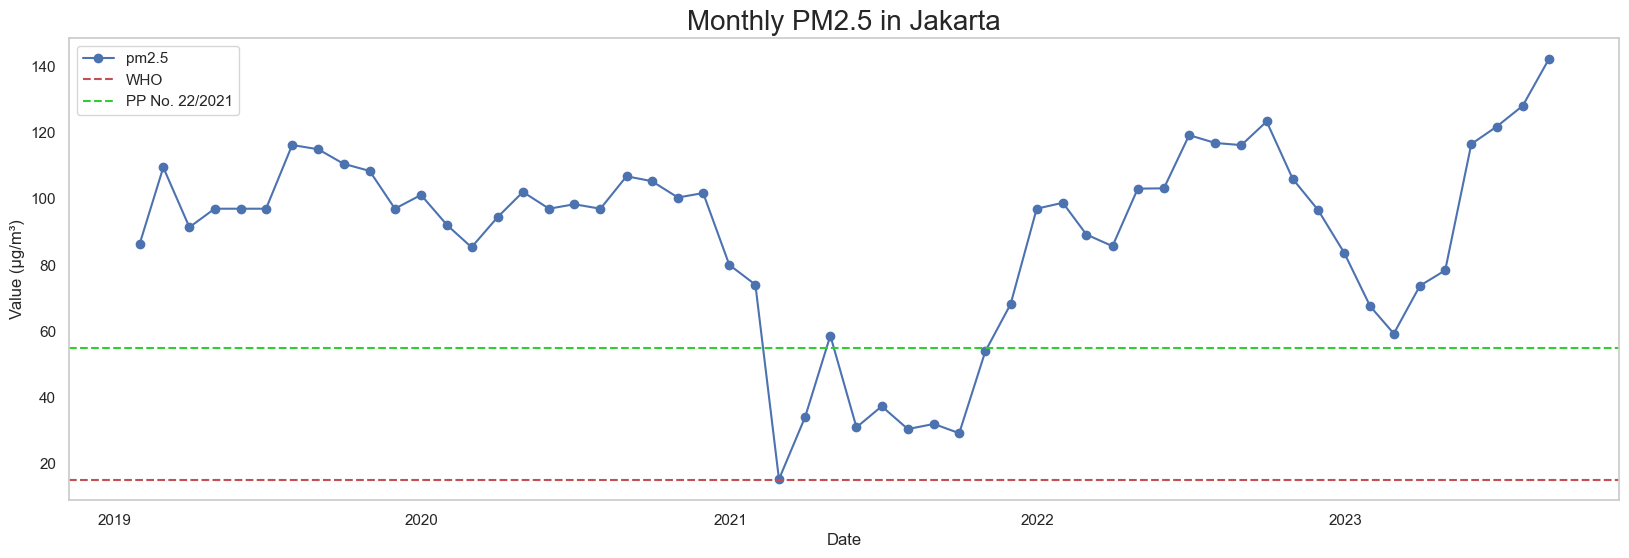

In [40]:
plt.figure(figsize=(20, 6))

plt.plot(ma_2019.index, ma_2019['pm25'], label='pm2.5', marker='o')
# plt.plot(ma_2019.index, ma_2019['pm10'], label='pm10', marker='o')
plt.axhline(y=15, color='r', linestyle='--', label='WHO')
plt.axhline(y=55, color='limegreen', linestyle='--', label='PP No. 22/2021')

plt.xlabel('Date')
plt.ylabel("Value (\u00B5g/m³)")
plt.title('Monthly PM2.5 in Jakarta', size = 20)
plt.legend()
plt.grid()

plt.show()

# Insights

1. Almost all year PM2.5 in Jakarta is higher than the standard quality of WHO 15 micrograms/m3) and Peraturan Pemerintah No. 22/2021 (55 micrograms/m3), except in several early months of 2021.
2. Seasonal variation of PM2.5 shows that it is affected by the climate conditions, wet season caused a decrease while dry season caused an increase of PM2.5.
3. It is suspected that the current dry season (strengthen with El Nino event) caused the rise of PM2.5 in Jakarta.